# Parametric tests

## 2 SAMPLE T TEST 

In [52]:
import numpy as np
from scipy.stats import t

N_con = 20
df_con = N_con-1 #dof of control group
N_exp = 20
df_exp = N_exp-1 #dof of experimental group

#Significance level
alpha = 0.05

#data of control group with t distribution 
X_con = np.random.standard_t(df_con, N_con)
#data of experimental group with t distribution
X_exp = np.random.standard_t(df_exp, N_exp)

#mean of control
mu_con = np.mean(X_con)
#mean of experimental group
mu_exp = np.mean(X_exp)

#variance of control
sigma_sq_con = np.var(X_con)
#variance of experimental 
sigma_sq_exp = np.var(X_exp)

#pooled variance
pooled_var_t_test = (((N_con-1)*sigma_sq_con+(N_exp-1)*sigma_sq_exp)/(N_exp+N_con-2))*(1/N_con+1/N_exp)

#standard error
SE = np.sqrt(pooled_var_t_test)

#Test statistic 
T = (mu_con-mu_exp)/SE

# P value 
P_val = t.sf(T, N_con+N_exp-2)*2

#critical value for 2 sided sample t-test
z_crit= t.ppf(1-alpha,N_exp+N_con-2)

#margin of error
margin_error = SE*z_crit

# Confidence Interval

CI = ((mu_con-mu_exp)-margin_error,(mu_con-mu_exp)+margin_error)

print("T-stat: ",T)
print("P value: ", P_val)
print("t_crit: ",z_crit) # this will always be same for t dist 2 sided** 
print("Confidence interval: ", CI)


T-stat:  -0.6341884165454409
P value:  1.4702425989059527
t_crit:  1.6859544576438141
Confidence interval:  (-0.9219007196565695, 0.4179155865725529)


<AxesSubplot:>

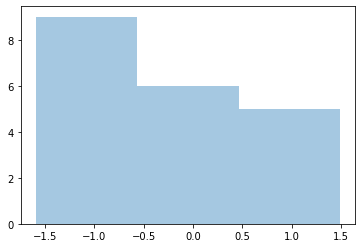

In [53]:
import seaborn as sns
sns.distplot(X_con,kde=False)

<AxesSubplot:>

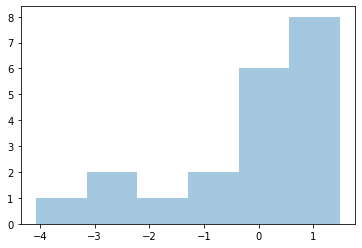

In [54]:
import seaborn as sns
sns.distplot(X_exp,kde=False)

## 2 sample Z test

### case 1 : Z test for comparing proportions (2 sided)

In [55]:
import numpy as np
from scipy.stats import norm

X_con = 1242 #click control
N_con = 9886 #impression control
X_exp = 974 #click experimental 
N_exp = 10072 #impression experimental

alpha = 0.05
p_con_hat = X_con/N_con
p_exp_hat = X_exp/N_exp
p_pooled_hat = (X_con+X_exp)/(N_con+N_exp)
p_pooled_var = p_pooled_hat*(1-p_pooled_hat)*((1/N_con)+(1/N_exp))

SE = np.sqrt(p_pooled_var)

Z_stat = (p_con_hat - p_exp_hat)/SE

P_val = norm.sf(T_stat)*2

Z_crit = norm.ppf(1-alpha/2)

margin_error = Z_crit*SE
CI = ((p_con_hat - p_exp_hat) - margin_error,(p_con_hat - p_exp_hat) + margin_error)

print("Test stat: ",Z_stat)
print("P value: ", P_val)
print("z_crit: ",Z_crit) # this will always be same for t dist 2 sided** 
print("Confidence interval: ", CI)

Test stat:  6.503782823926798
P value:  7.832495206930039e-11
z_crit:  1.959963984540054
Confidence interval:  (0.020210660302896456, 0.03764628777733894)


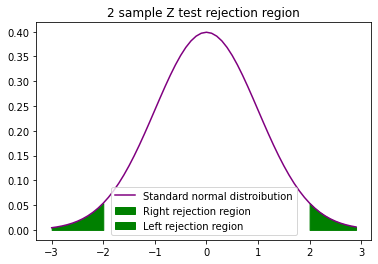

In [56]:
import matplotlib.pyplot as plt
z= np.arange(-3,3, 0.1)
#print(z) != print(norm.pdf(z))
plt.plot(z, norm.pdf(z), label ="Standard normal distroibution",color='purple')
plt.fill_between(z[z>Z_crit], norm.pdf(z[z>Z_crit]),label='Right rejection region',color='green')
plt.fill_between(z[z<(-1)*Z_crit],norm.pdf(z[z<(-1)*Z_crit]), label="Left rejection region",color='green')
plt.title("2 sample Z test rejection region")
plt.legend()
plt.show()

### case 2 : Z test for comparing means (2 sided)

In [61]:
import numpy as np
from scipy.stats import norm

N_con = 60
N_exp = 60

alpha=0.5
X_con = np.random.randint(100,size=N_con)
X_con = np.random.randint(100,size=N_exp)

#Calculating means of control and experimental group
mu_con = np.mean(X_con)
mu_exp = np.mean(X_exp)

var_con = np.var(X_con)
var_exp = np.var(X_exp)
 
# pooled variance
pooled_var = (var_con/N_con) + (var_exp/N_exp)
SE = np.sqrt(pooled_var)

T_stat = (mu_con-mu_exp)/SE

p_val = norm.sf(T_stat)*2

Z_crit = norm.ppf(1-alpha/2)

margin_error = Z_crit*SE

CI =(mu_con-mu_exp-margin_error,mu_con-mu_exp+margin_error)

print("Test stat: ",T_stat)
print("P value: ", p_val)
print("z_crit: ",Z_crit) # this will always be same for t dist 2 sided** 
print("Confidence interval: ", CI)

# CI_low < mu_con-mu_exp < CI_upp

Test stat:  -253.69505976305996
P value:  2.0
z_crit:  0.6744897501960817
Confidence interval:  (-931.1858116042464, -926.247521729087)


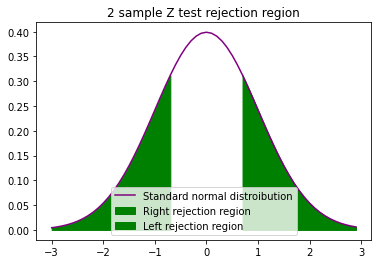

In [62]:
import matplotlib.pyplot as plt
z= np.arange(-3,3, 0.1)
plt.plot(z, norm.pdf(z), label ="Standard normal distroibution",color='purple')
plt.fill_between(z[z>Z_crit], norm.pdf(z[z>Z_crit]),label='Right rejection region',color='green')
plt.fill_between(z[z<(-1)*Z_crit],norm.pdf(z[z<(-1)*Z_crit]), label="Left rejection region",color='green')
plt.title("2 sample Z test rejection region")
plt.legend()
plt.show()

# Non parametric test 

### Chi squared test 

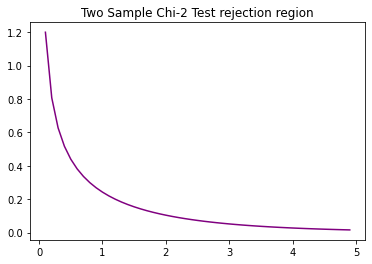

In [70]:
import numpy as np
from scipy.stats import chi2

O = np.array([86,83,5810,3920])
T = np.array([105,65,5781,3841])

def calculate_D(O,T):
    D_sum=0
    for i in range(len(O)):
        D_sum+= (O[i]+T[i])**2 / T[i]
    return(D_sum)

D = calculate_D(O,T)
pval = chi2.sf(D,df=1)

import matplotlib.pyplot as plt
# Step 1: pick a x-axis range like in case of z-test (-3,3,0.1)
d = np.arange(0,5,0.1)
# Step 2: drawing the initial pdf of chi-2 with df = 1 and x-axis d range we just created
plt.plot(d, chi2.pdf(d, df = 1), color = "purple")
# Step 3: filling in the rejection region
plt.fill_between(d[d>D], chi2.pdf(d[d>D], df = 1), color = "y")
# Step 4: adding title
plt.title("Two Sample Chi-2 Test rejection region")
# Step 5: showing the plt graph
plt.show()


In [71]:
d[d>D]

array([], dtype=float64)

In [72]:
d

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

In [73]:
D

39606.193024465814

In [76]:
chi2.pdf(d[d>D], df = 1)

array([], dtype=float64)

      0     1
0   204   Exp
1   205   Exp
2   205   Exp
3   196   Exp
4   195   Exp
..  ...   ...
95  203  Cont
96  214  Cont
97  220  Cont
98  205  Cont
99  197  Cont

[100 rows x 2 columns]
Mean of X_bar_exp - X_bar_con -2.6604644825693526
Standard Error of X_bar_exp - X_bar_con 0.21729133452715027
CI of X_bar_exp - X_bar_con [-3.086347672395212, -2.2345812927434934]


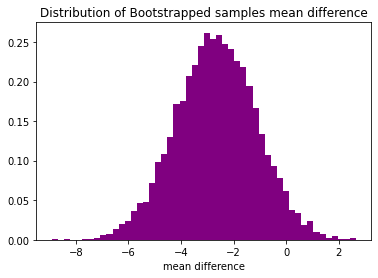

In [79]:
import numpy as np
import pandas as pd
from scipy.stats import norm

N = 100
X = pd.Series(np.random.binomial(300,0.7,size =N))
Y1 = np.repeat("Exp",N/2)
N_exp = len(Y1)
Y2 = np.repeat("Cont",N/2)
N_con = len(Y2)

Y = pd.Series(np.append(Y1,Y2))
data = pd.concat([X,Y],axis = 1)
print(data)
means_per_group = data.groupby(1, group_keys = False)[0].mean()
medians_per_group = data.groupby(1)[0].median()

alpha = 0.05
def Bootrapping_for_diff_means_medians(data,B):
    boot_mean_diff = []
    boot_medians_diff = []

    boot_means_con = []
    boot_means_exp = []

    count_num_positives_meandiff = 0
    count_num_positives_mediandiff = 0

    for i in range(B):

        boot_sample = data.sample(frac = 1, replace = True)

        #means of bootstrap sample for control and experimental group
        boot_means_per_group = boot_sample.groupby(1)[0].mean()
        boot_sample_mean_con = boot_means_per_group["Cont"]
        boot_sample_mean_exp = boot_means_per_group["Exp"]

        boot_means_con.append(boot_sample_mean_con)
        boot_means_exp.append(boot_sample_mean_exp)

        # calculating the difference in means per bootstrap sample
        diff_means = boot_sample_mean_exp - boot_sample_mean_con

        #counting number of times is the difference positive
        if diff_means > 0:
            count_num_positives_meandiff += 1

        # medians of bootstrap sample for control and experimental group
        boot_medians_per_group = boot_sample.groupby(1)[0].median()

        # calculating the difference in medians per bootstrap sample
        diff_medians = boot_medians_per_group["Exp"] - boot_medians_per_group["Cont"]
        if diff_medians > 0:
            count_num_positives_mediandiff += 1

        boot_mean_diff.append(diff_means)
        boot_medians_diff.append(diff_medians)

    return(boot_means_con,boot_means_exp,count_num_positives_meandiff,count_num_positives_mediandiff,boot_mean_diff)

B = 10000
X_bars_con,X_bars_exp ,n_means, n_medians,boot_mean_diff = Bootrapping_for_diff_means_medians(data,B)
Z_mean = np.mean(X_bars_exp)- np.mean(X_bars_con)
Z_sigma = np.sqrt((np.var(X_bars_exp)/N_exp + np.var(X_bars_con)/N_con))
CI = [Z_mean - norm.ppf(1-alpha/2)*Z_sigma, Z_mean + norm.ppf(1-alpha/2)*Z_sigma]

print("Mean of X_bar_exp - X_bar_con", Z_mean)
print("Standard Error of X_bar_exp - X_bar_con", Z_sigma)
print("CI of X_bar_exp - X_bar_con", CI)

p_value_diff_means = n_means/B
p_value_diff_medians = n_medians/B

CI = np.percentile(boot_mean_diff, [2.5, 97.5])

import matplotlib.pyplot as plt
counts,bins,ignored = plt.hist(boot_mean_diff,50,density = True,color = 'purple')
plt.xlabel("mean difference")
plt.title("Distribution of Bootstrapped samples mean difference")
plt.show()